In [1]:
import keras
import tensorflow as tf
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from scipy.io import loadmat
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

data = np.genfromtxt('TrackTrainingSetArSc.csv',delimiter=' ', skip_header=1)
print(("Rozmiar zestawu treningowego = %d x %d ")%(data.shape[0], data.shape[1]))
datapd = pd.read_csv('TrackTrainingSetArSc.csv', sep=' ', header=0)
datapd.head()

Rozmiar zestawu treningowego = 51796 x 21 


,p,px,py,pz,q,enDep,Ndedx,pFirstX,pFirstY,pFirstZ,...,pFirstBy,pFirstBz,pLastX,pLastY,pLastZ,pLastBx,pLastBy,pLastBz,qOverPXZ,nMaxPoint
0,35.3962,1.67535,-0.135090,35.3563,1,1.47675,149,13.8034,-1.74045,-106.713,...,-0.945703,0.014367,70.4970,-5.03450,727.355,0.0,0.0,0.0,1.776860e-08,163
1,27.3294,1.72625,-0.092073,27.2747,1,1.28169,145,18.9224,-1.51537,-103.926,...,-0.962149,0.011925,89.8605,-4.22046,691.489,0.0,0.0,0.0,1.463870e-08,158
2,12.4532,1.29021,-0.343452,12.3815,1,1.44962,150,24.8742,-12.74300,-109.514,...,-0.925083,0.114150,160.6840,-37.63010,725.896,0.0,0.0,0.0,1.754720e-08,163
3,10.7554,1.39227,0.072020,10.6646,1,1.44501,147,33.5505,2.74863,-110.061,...,-0.878054,-0.025127,197.0500,9.07875,725.320,0.0,0.0,0.0,1.977520e-08,160
4,17.3145,1.11973,-0.144980,17.2776,1,1.46821,127,12.9113,-3.92648,-100.471,...,-0.997326,0.028064,100.8290,-10.90940,726.866,0.0,0.0,0.0,1.816090e-08,154


Spis treści.<br>
1. Wstęp.
2. Teoria.
    1. Uczenie maszynowe:
            a) nadzorowane (w tym sieci neuronowe)
            b) nienadzorowane
    2. Pakiet Keras
    3. Eksperyment NA61/SHINE (http://shine.web.cern.ch/)
    4. Detektory projekcji czasowej (Time Projection Champer TPC).
    5. Rekonstrukcja sladów w eksperymencie NA61/SHINE.
    6. Potencjalna liczba punktów w komorach TPC - bieżąca implementacja.
3. Potencjalna liczba punktów w komorze TPC - implementacja algorytmu uczenia maszynowego.
    1. Zestaw treningowy.
    2. Rozkłady cech i podstawowe zależności.
    3. Inżynieria cech.
    4. Implementacja sieci neuronowej oraz analiza danych.
4. Podsumowanie.

__23 maj 2019 KS:__ Proszę zaznajomic się z materiałami, które Panu udostepniłam. Proszę wykonać rysunki: 
1. Rozkład każdej z 20-tu cech (histogramy 1-d)
2. Zależność NMaxPoint (kolumna 20 na osi y) vs cecha dla każdej cechy (20 rysunków, histogramy 2-d).

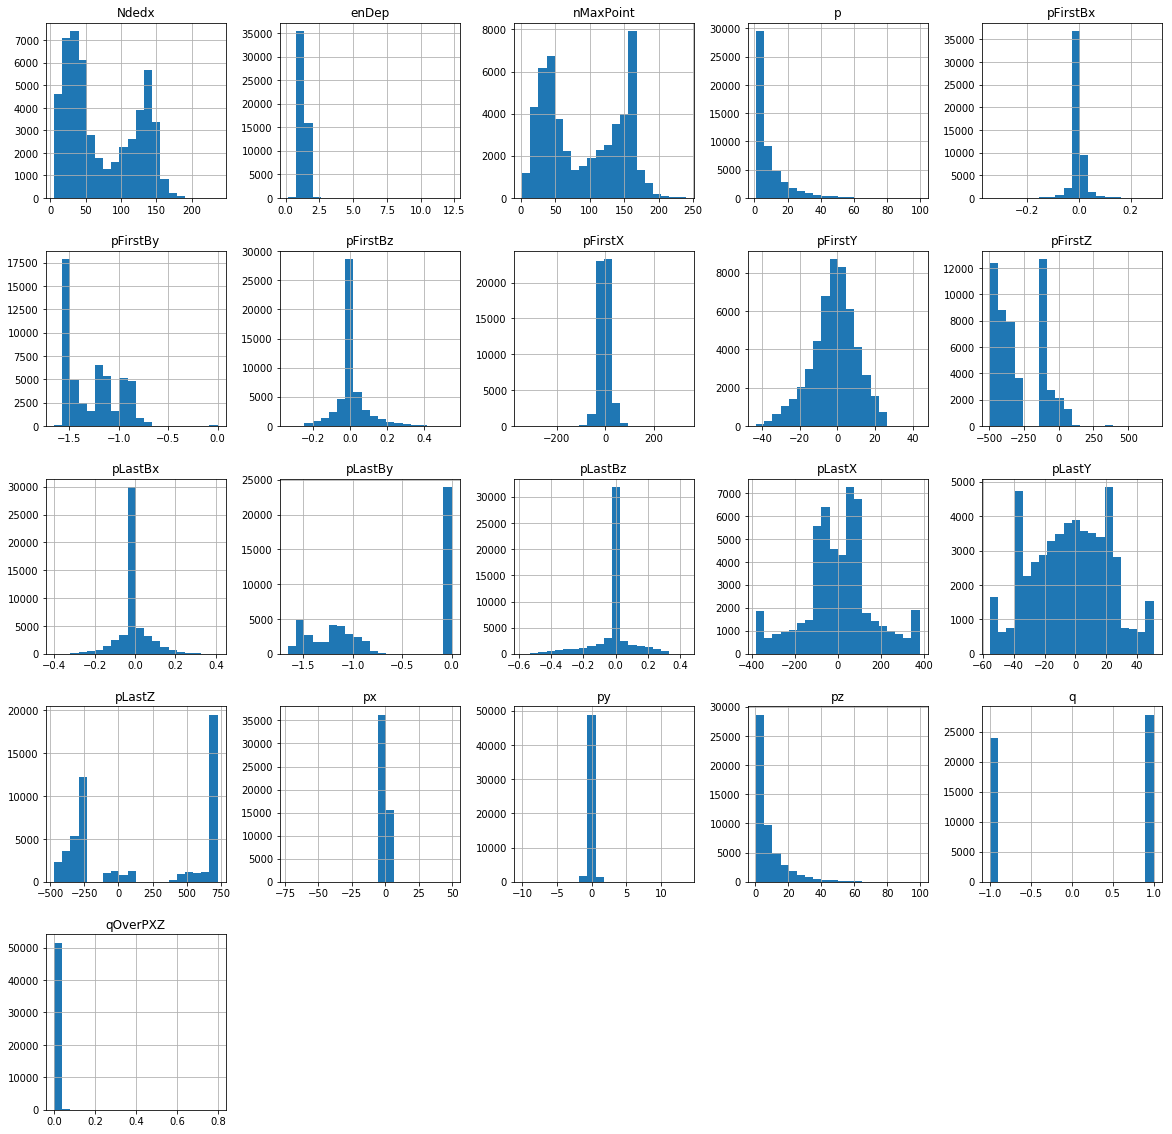

In [3]:
_ = datapd.hist(figsize=(20,20), bins=20)

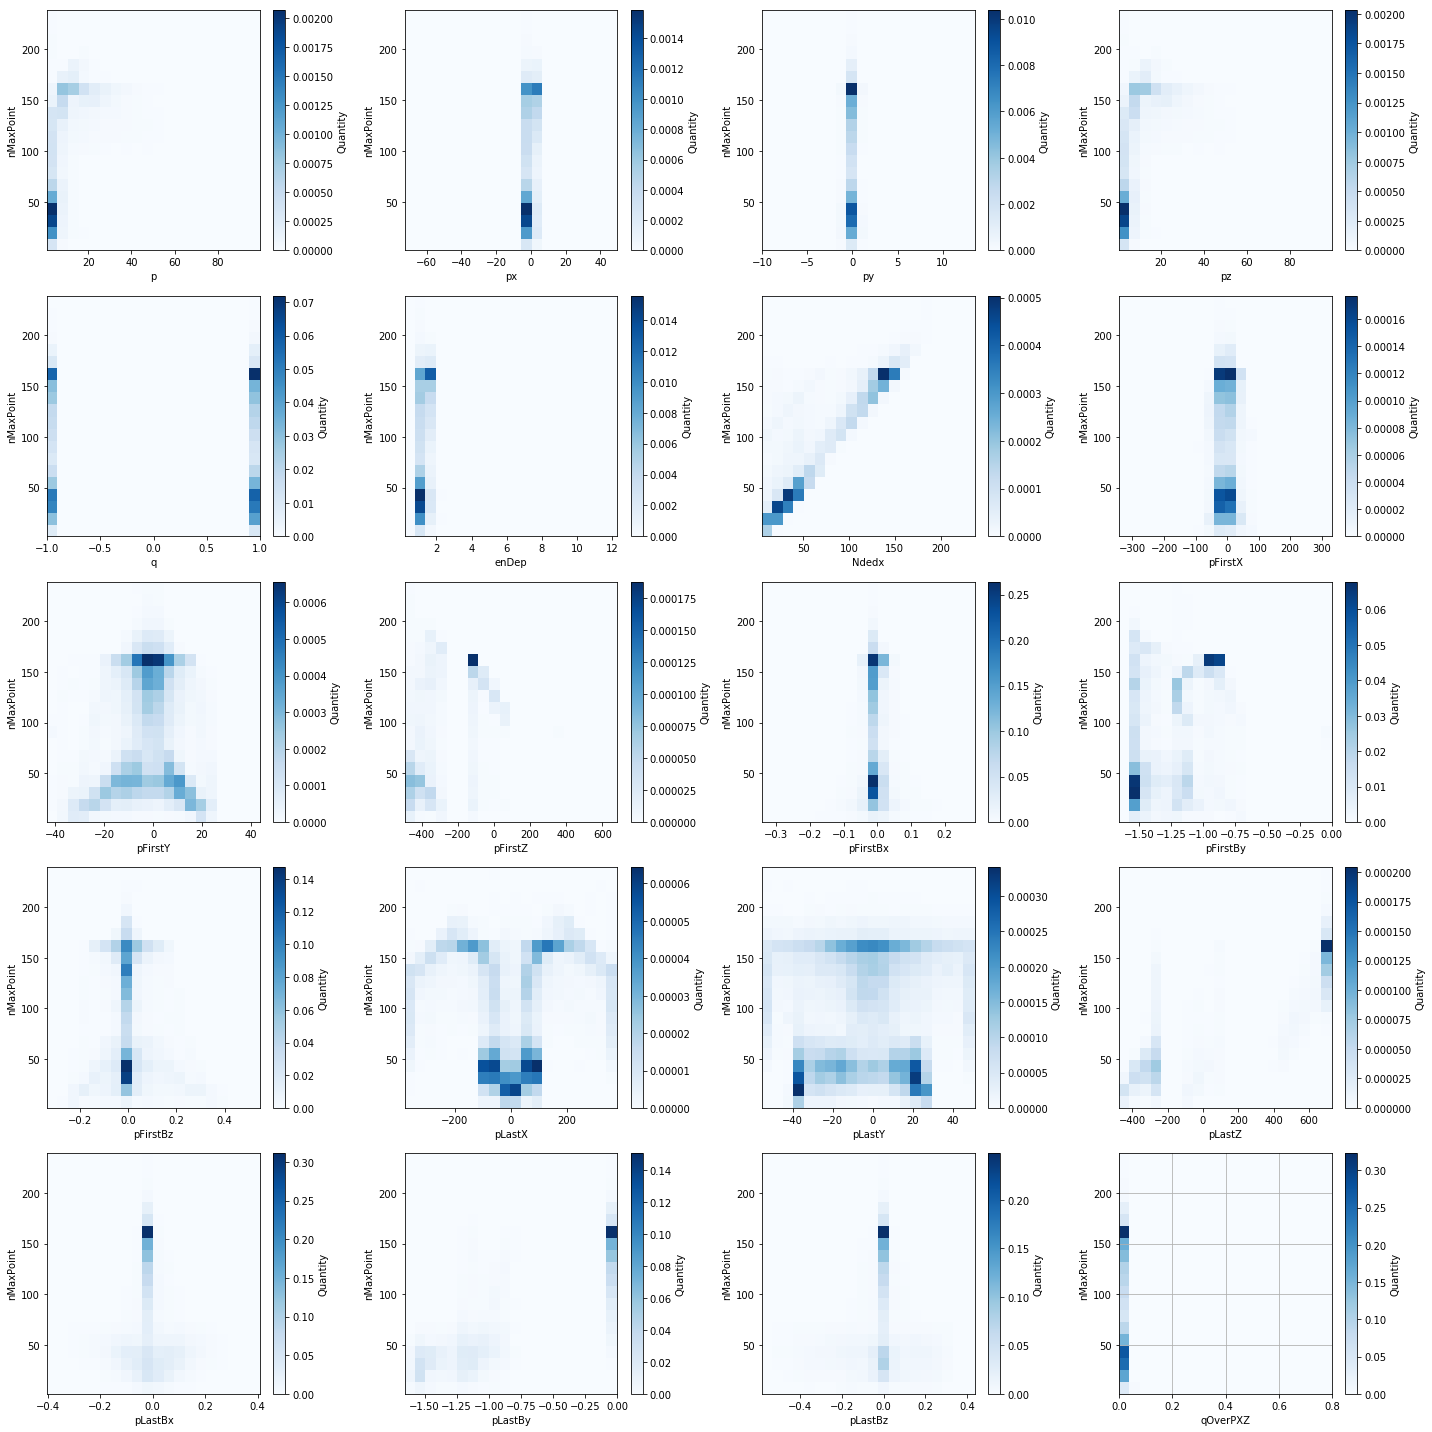

In [4]:
from matplotlib.colors import LogNorm

i=1
plt.figure(figsize=(20,20))
for key in datapd.drop("nMaxPoint", axis=1).keys():
    plt.subplot(5,4,i)
    i+=1
    plt.hist2d(x=datapd[key], y=datapd['nMaxPoint'], bins=20, cmap=plt.cm.Blues, normed=LogNorm())
    plt.xlabel(key)
    plt.ylabel('nMaxPoint')
    plt.colorbar().set_label('Quantity')
    plt.tight_layout()
plt.grid()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X, y = np.array(datapd.drop('nMaxPoint', axis=1)), np.array(datapd['nMaxPoint'])
print(y.shape)

y = to_categorical(y)
print(y.shape)

train, test, train_label, test_label = train_test_split(X, y, shuffle=True, test_size=0.25)

(51796,)
(51796, 240)


In [6]:
avg, std = np.zeros(train.shape[1]), np.zeros(train.shape[1])

for i in range(train.shape[1]):
    avg[i] = np.mean(train[:, i])
    std[i] = np.std(train[:, i])
    
train_normalized = (train - avg)/std
test_normalized = (test - avg)/std

In [7]:
from keras import optimizers, layers, models, regularizers, losses, metrics

In [8]:
# drop = 0.1
# model = models.Sequential()
# # model.add(layers.Dense(256, activation='relu', input_shape=(train.shape[1], )))
# model.add(layers.Dense(32, activation='relu', input_shape=(train.shape[1], )))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(32))
# model.add(layers.Dense(1, activation='relu'))
# model.compile(loss=losses.mean_squared_error, optimizer=optimizers.Adam(lr=1e-4), metrics=[metrics.mae, metrics.mse])

In [9]:
# history = model.fit(train_normalized, train_label, epochs=200, validation_split=0.2, batch_size=32)

In [10]:
# plt.plot(history.history['mean_absolute_error'])
# plt.plot(history.history['val_mean_absolute_error'])
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [11]:
# plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_mean_squared_error'])
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [12]:
# prediction = model.predict(test_normalized)

In [13]:
# prediction[:10].astype(np.int64).flatten()

In [14]:
# (prediction.astype(np.int64).flatten()==test_label).sum()/train_label.shape[0]*100

In [15]:
# model.save_weights('linear.h5')

In [16]:
# test_label[:10]

In [17]:
test_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
# drop = 0.1
# model2 = models.Sequential()
# model2.add(layers.Dense(256, activation='relu', input_shape=(train.shape[1], )))
# model2.add(layers.Dropout(drop))
# model2.add(layers.Dense(256, activation='relu'))
# model2.add(layers.Dropout(drop))
# model2.add(layers.Dense(256, activation='relu'))
# model2.add(layers.Dropout(drop))
# model2.add(layers.Dense(256, activation='relu'))
# model2.add(layers.Dropout(drop))
# model2.add(layers.Dense(256, activation='relu'))
# model2.add(layers.Dropout(drop))
# model2.add(layers.Dense(256, activation='relu'))
# model2.add(layers.Dropout(drop))
# model2.add(layers.Dense(256, activation='relu'))
# model2.add(layers.Dropout(drop))
# model2.add(layers.Dense(256, activation='relu'))
# model2.add(layers.Dropout(drop))
# model2.add(layers.Dense(256, activation='relu'))
# model2.add(layers.Dropout(drop))
# model2.add(layers.Dense(256, activation='relu'))
# model2.add(layers.Dropout(drop))
# model2.add(layers.Dense(256, activation='relu'))
# model2.add(layers.Dropout(drop))
# model2.add(layers.Dense(test_label.shape[1], activation='softmax'))
# model2.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(lr=1e-4), metrics=[metrics.mae, metrics.mse])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [202]:
drop = 0.1
model2 = models.Sequential()
model2.add(layers.Dense(256, activation='relu', input_shape=(train.shape[1], )))
model2.add(layers.Dropout(drop))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(drop))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(drop))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(drop))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(drop))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(drop))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(drop))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(drop))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(drop))
model2.add(layers.Dense(test_label.shape[1], activation='softmax'))
model2.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(lr=1e-3), metrics=[metrics.mae, metrics.mse, 'accuracy'])

In [203]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_203 (Dense)            (None, 256)               5376      
_________________________________________________________________
dropout_188 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_204 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_189 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_205 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_190 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_206 (Dense)            (None, 256)               65792     
__________

In [204]:
learning_rate = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto', min_delta=0.01, cooldown=0, min_lr=0)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=8, verbose=1, mode='auto', baseline=None, restore_best_weights=True)


In [205]:
history2 = model2.fit(train_normalized, train_label, epochs=200, validation_split=0.2, batch_size=128, callbacks=[learning_rate, early_stop])

Train on 31077 samples, validate on 7770 samples
Epoch 1/200
31077/31077 [==============================] - 9s 304us/step - loss: 4.4571 - mean_absolute_error: 0.0081 - mean_squared_error: 0.0041 - acc: 0.0335 - val_loss: 4.0488 - val_mean_absolute_error: 0.0081 - val_mean_squared_error: 0.0040 - val_acc: 0.0436
Epoch 2/200
31077/31077 [==============================] - 6s 188us/step - loss: 3.8784 - mean_absolute_error: 0.0080 - mean_squared_error: 0.0040 - acc: 0.0622 - val_loss: 3.5140 - val_mean_absolute_error: 0.0079 - val_mean_squared_error: 0.0039 - val_acc: 0.0924
Epoch 3/200
31077/31077 [==============================] - 6s 202us/step - loss: 3.5590 - mean_absolute_error: 0.0079 - mean_squared_error: 0.0040 - acc: 0.0866 - val_loss: 3.3607 - val_mean_absolute_error: 0.0078 - val_mean_squared_error: 0.0039 - val_acc: 0.1023
Epoch 4/200
31077/31077 [==============================] - 6s 204us/step - loss: 3.4065 - mean_absolute_error: 0.0078 - mean_squared_error: 0.0039 - acc: 0.

Epoch 32/200
31077/31077 [==============================] - 6s 187us/step - loss: 2.6590 - mean_absolute_error: 0.0073 - mean_squared_error: 0.0037 - acc: 0.1819 - val_loss: 2.6405 - val_mean_absolute_error: 0.0072 - val_mean_squared_error: 0.0036 - val_acc: 0.1885
Epoch 33/200
31077/31077 [==============================] - 6s 184us/step - loss: 2.6551 - mean_absolute_error: 0.0073 - mean_squared_error: 0.0037 - acc: 0.1819 - val_loss: 2.6083 - val_mean_absolute_error: 0.0072 - val_mean_squared_error: 0.0036 - val_acc: 0.1997

Epoch 00033: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 34/200
31077/31077 [==============================] - 6s 188us/step - loss: 2.5189 - mean_absolute_error: 0.0072 - mean_squared_error: 0.0036 - acc: 0.2076 - val_loss: 2.4580 - val_mean_absolute_error: 0.0070 - val_mean_squared_error: 0.0035 - val_acc: 0.2399
Epoch 35/200
31077/31077 [==============================] - 6s 190us/step - loss: 2.4796 - mean_absolute_error: 0.0071 -

31077/31077 [==============================] - 6s 189us/step - loss: 2.3665 - mean_absolute_error: 0.0070 - mean_squared_error: 0.0035 - acc: 0.2338 - val_loss: 2.3673 - val_mean_absolute_error: 0.0069 - val_mean_squared_error: 0.0034 - val_acc: 0.2721
Restoring model weights from the end of the best epoch
Epoch 00061: early stopping


In [206]:
prediction2 = model2.predict(test_normalized)

In [207]:
prediction2[0].argmax()

39

In [208]:
test_label[0].argmax()

41

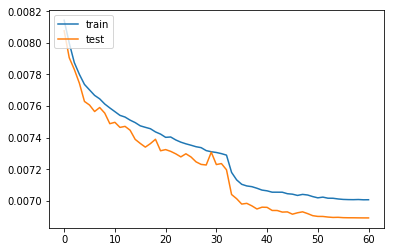

In [209]:
plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

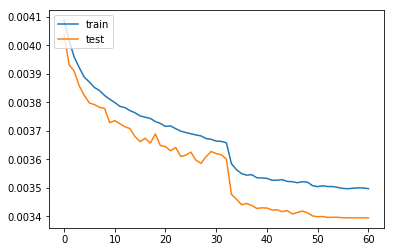

In [210]:
plt.plot(history2.history['mean_squared_error'])
plt.plot(history2.history['val_mean_squared_error'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

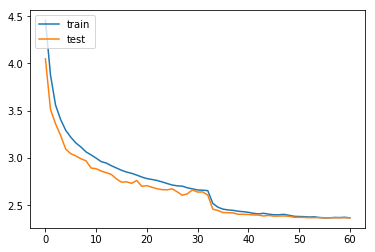

In [211]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

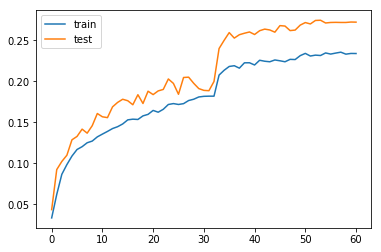

In [212]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [213]:
for i in range(20):
    print("pred: %d, test: %d" % (prediction2[i].argmax(), test_label[i].argmax()))

pred: 39, test: 41
pred: 159, test: 152
pred: 133, test: 132
pred: 46, test: 46
pred: 51, test: 51
pred: 15, test: 14
pred: 9, test: 10
pred: 38, test: 40
pred: 163, test: 163
pred: 73, test: 84
pred: 34, test: 34
pred: 49, test: 49
pred: 13, test: 14
pred: 29, test: 29
pred: 179, test: 179
pred: 33, test: 31
pred: 160, test: 160
pred: 109, test: 110
pred: 139, test: 139
pred: 103, test: 100


In [214]:
#accuracy
(prediction2.argmax(axis=1)==test_label.argmax(axis=1)).sum()/train_label.shape[0]*100

9.380389734085

In [215]:
#średni błąd
(np.absolute(prediction2.argmax(axis=1)-test_label.argmax(axis=1))).mean()

3.8159703452004017

In [216]:
#maksymalny błąd
(np.absolute(prediction2.argmax(axis=1)-test_label.argmax(axis=1))).max()

161

In [217]:
#mediana
np.median((np.absolute(prediction2.argmax(axis=1)-test_label.argmax(axis=1))))

1.0

In [127]:
# model2.save('logistic.h5')

### Zapisany model

In [35]:
model = models.load_model('logistic.h5')

In [36]:
prediction = model.predict(test_normalized)

In [46]:
#accuracy
(prediction.argmax(axis=1)==test_label.argmax(axis=1)).sum()/train_label.shape[0]*100

11.540144670116097

In [47]:
#średni błąd
(np.absolute(prediction.argmax(axis=1)-test_label.argmax(axis=1))).mean()

2.951115916286972

In [48]:
#maksymalny błąd
(np.absolute(prediction.argmax(axis=1)-test_label.argmax(axis=1))).max()

141

In [50]:
#mediana
np.median((np.absolute(prediction2.argmax(axis=1)-test_label.argmax(axis=1))))

1.0

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               5376      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
__________